In [76]:
import numpy as np 
import pandas as pd
import pprint
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import Pipeline
import seaborn as sns

In [77]:
# loading Data
df_train= pd.read_csv("/Users/isfitdeveloper01/Documents/ict_projects/dataset/train.csv")
df_test= pd.read_csv("/Users/isfitdeveloper01/Documents/ict_projects/dataset/test.csv")
df_train.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [78]:
df_train.describe()

,ID,score_1,score_2,score_3,score_4,score_5,score_6,overall
count,30336.000000,27150.000000,24286.000000,27167.000000,27145.000000,26851.000000,30336.000000,30336.000000
mean,33998.602716,3.370460,3.784773,3.630047,3.943986,3.322446,1.388482,3.588179
std,19506.284643,1.301983,1.300164,1.225714,1.043053,1.314696,21.390609,0.996981
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,17198.750000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,3.000000
50%,34121.500000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000,4.000000
75%,50907.500000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,5.000000


In [49]:
df_test.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [79]:
df_train.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [80]:
df_train.isna().sum()

ID                    0
Place                 0
location          11254
date                  0
status                0
job_title             0
summary              52
positives             0
negatives             0
advice_to_mgmt    13277
score_1            3186
score_2            6050
score_3            3169
score_4            3191
score_5            3485
score_6               0
overall               0
dtype: int64

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30336 non-null  int64  
 1   Place           30336 non-null  object 
 2   location        19082 non-null  object 
 3   date            30336 non-null  object 
 4   status          30336 non-null  object 
 5   job_title       30336 non-null  object 
 6   summary         30284 non-null  object 
 7   positives       30336 non-null  object 
 8   negatives       30336 non-null  object 
 9   advice_to_mgmt  17059 non-null  object 
 10  score_1         27150 non-null  float64
 11  score_2         24286 non-null  float64
 12  score_3         27167 non-null  float64
 13  score_4         27145 non-null  float64
 14  score_5         26851 non-null  float64
 15  score_6         30336 non-null  int64  
 16  overall         30336 non-null  float64
dtypes: float64(6), int64(2), object

In [82]:
df_train_original=df_train.copy()
df_test_original=df_test.copy()

4.0    35.232068
3.0    31.348892
5.0    19.696071
2.0    11.639636
1.0     2.083333
Name: overall, dtype: float64


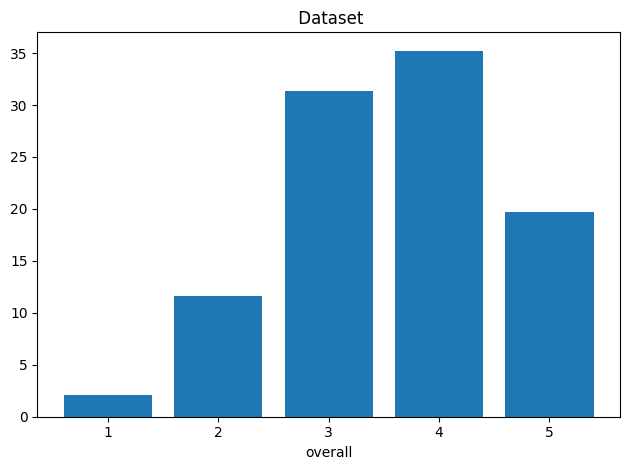

In [83]:
# checking if the dataset is Imbalanced or not 

print(df_train.overall.value_counts()/df_train.shape[0]*100)
plt.bar(df_train.overall.value_counts().keys(),df_train.overall.value_counts()/df_train.shape[0]*100)
plt.xlabel("overall")
plt.ylabel("")
plt.title(" Dataset")
plt.tight_layout()

In [84]:
for col in df_train_original.select_dtypes(include='object').columns:
    print(col)
    print(df_train_original[col].unique())

Place
['startup_1' 'startup_4' 'startup_5' 'startup_3' 'startup_2' 'startup_6']
location
[nan 'Mountain View, CA' 'New York, NY' ...
 'Cambridge, South West England, England (UK)' 'Blackburn, England (UK)'
 'Pudong, Shanghai (China)']
date
[' Dec 11, 2018' ' Jun 21, 2013' ' May 10, 2014' ... ' Jan 7, 2011'
 ' Jan 2, 2011' ' Dec 16, 2010']
status
['Current Employee ' 'Former Employee ']
job_title
[' Anonymous Employee' ' Program Manager' ' Software Engineer III' ...
 ' Relationship Marketing' ' Director, Product Management'
 ' Senior Project Managet']
summary
['Best Company to work for'
 'Moving at the speed of light, burn out is inevitable'
 'Great balance between big-company security and fun, fast-moving projects'
 ... 'Microsoft Services is bad.'
 'Enriching experience for a beginner but bad for long term growth'
 "It's a competitive work place, with overload work items, growing politics and less loyalty"]
positives
['People are smart and friendly'
 '1) Food, food, food. 15+ cafes on

In [85]:
df_train_original=df_train_original.drop(['summary'],axis=1)

In [86]:
df_train_original=df_train_original.drop(['job_title'],axis=1)

In [87]:
df_train_original=df_train_original.drop(['date'],axis=1)

In [88]:
df_train_original=df_train_original.drop(['location'],axis=1)

In [89]:
df_train_original

,ID,Place,status,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,Current Employee,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,Former Employee,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,Current Employee,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,Current Employee,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,Current Employee,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30331,67522,startup_6,Former Employee,MS is a good company but hire wrong people. Wo...,Senior management has no leadership and very o...,Major management revamp esp in APAC. It's not ...,3.0,NaN,1.5,2.0,1.0,0,2.0
30332,67524,startup_6,Former Employee,"Good benefits package, huge customer base.","Politics, very slow, lots of dead wood.",Move on.,3.5,NaN,3.5,4.0,4.0,0,4.0
30333,67525,startup_6,Former Employee,"-Access to a wide range of technologies, compl...",-Testers(SDET's ) do not get as many opportuni...,Make the company leaner and Meaner. (which wou...,3.0,NaN,4.0,4.0,2.0,0,3.0
30334,67527,startup_6,Current Employee,Nice place to work. Good atmosphere with advan...,Management confusion at times with vision for ...,NaN,3.0,NaN,4.0,4.5,3.5,0,4.0


In [91]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train_original['Place'] = label_encoder.fit_transform(df_train_original['Place'])

df_train_original['status'] = label_encoder.fit_transform(df_train_original['status'])
df_train_original['positives'] = label_encoder.fit_transform(df_train_original['positives'])
df_train_original['negatives'] = label_encoder.fit_transform(df_train_original['negatives'])
df_train_original['advice_to_mgmt'] = label_encoder.fit_transform(df_train_original['advice_to_mgmt'])



In [92]:
df_train_original

,ID,Place,status,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,0,0,19943,3770,16077,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,0,1,1743,1721,355,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,0,0,95,66,6918,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,0,0,26084,8519,6783,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,0,0,15966,18211,16077,5.0,5.0,5.0,5.0,5.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30331,67522,5,1,17924,18018,7916,3.0,NaN,1.5,2.0,1.0,0,2.0
30332,67524,5,1,9276,16766,8764,3.5,NaN,3.5,4.0,4.0,0,4.0
30333,67525,5,1,1385,1526,8091,3.0,NaN,4.0,4.0,2.0,0,3.0
30334,67527,5,0,18887,12217,16077,3.0,NaN,4.0,4.5,3.5,0,4.0


In [93]:
df_train_original.isnull().sum()

ID                   0
Place                0
status               0
positives            0
negatives            0
advice_to_mgmt       0
score_1           3186
score_2           6050
score_3           3169
score_4           3191
score_5           3485
score_6              0
overall              0
dtype: int64

In [94]:
df_train_original1=df_train_original.fillna(method='pad')

In [95]:
df_train_original1.isnull().sum()

ID                0
Place             0
status            0
positives         0
negatives         0
advice_to_mgmt    0
score_1           0
score_2           0
score_3           0
score_4           0
score_5           0
score_6           0
overall           0
dtype: int64

In [96]:
df_train_original1['ID'].nunique()

30336

In [97]:
df_train_original1.shape

(30336, 13)

In [98]:
x=df_train_original1.drop(['overall'],axis=1)
y=df_train_original1['overall']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [100]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
y_pred=log_model.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [103]:
print('Accuracy is :',accuracy_score(y_test,y_pred))


Accuracy is : 0.35435666410284583


In [104]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svm=svc.predict(x_test)
acc_svm=accuracy_score(y_test,pred_svm)*100
acc_svm

35.721349302274476

In [105]:
x_test.columns

Index(['ID', 'Place', 'status', 'positives', 'negatives', 'advice_to_mgmt',
       'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [106]:
df_train_original1.columns

Index(['ID', 'Place', 'status', 'positives', 'negatives', 'advice_to_mgmt',
       'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'overall'],
      dtype='object')

In [70]:
df_test.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [110]:
df_test = df_test.drop(columns=['summary', 'location','date','job_title'], axis=1)


In [111]:
df_test.columns

Index(['ID', 'Place', 'status', 'positives', 'negatives', 'advice_to_mgmt',
       'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['Place'] = label_encoder.fit_transform(df_test['Place'])

df_test['status'] = label_encoder.fit_transform(df_test['status'])
df_test['positives'] = label_encoder.fit_transform(df_test['positives'])
df_test['negatives'] = label_encoder.fit_transform(df_test['negatives'])
df_test['advice_to_mgmt'] = label_encoder.fit_transform(df_test['advice_to_mgmt'])

In [114]:
pred_test=svc.predict(df_test)


In [115]:
loancsv =pd.DataFrame({"ID":df_test_original["ID"],"overall":pred_test})

In [116]:
loancsv

,ID,overall
0,5,4.0
1,6,4.0
2,7,4.0
3,8,4.0
4,9,4.0
...,...,...
29267,66959,4.0
29268,66965,4.0
29269,66968,4.0
29270,66978,4.0
